#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and Max temperature')

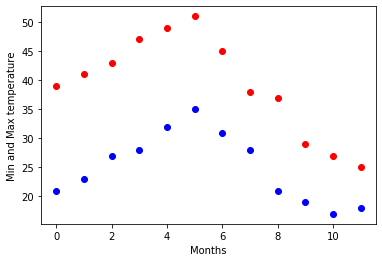

In [16]:
months=np.arange(12)
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo')
plt.xlabel('Months')
plt.ylabel('Min and Max temperature')

In [17]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

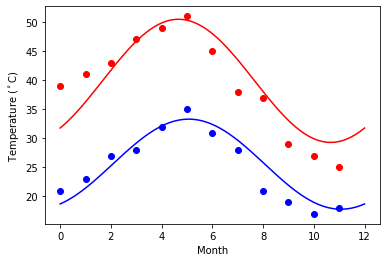

In [18]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### 1. Create a pie chart presenting the male/female proportion  2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [19]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [20]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
titanic['sex'].nunique()

2

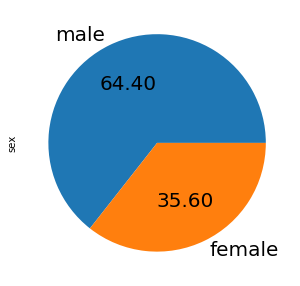

In [22]:
titanic['sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.2f',fontsize=20)

Text(0.5, 1.0, 'Fare paid and the Age')

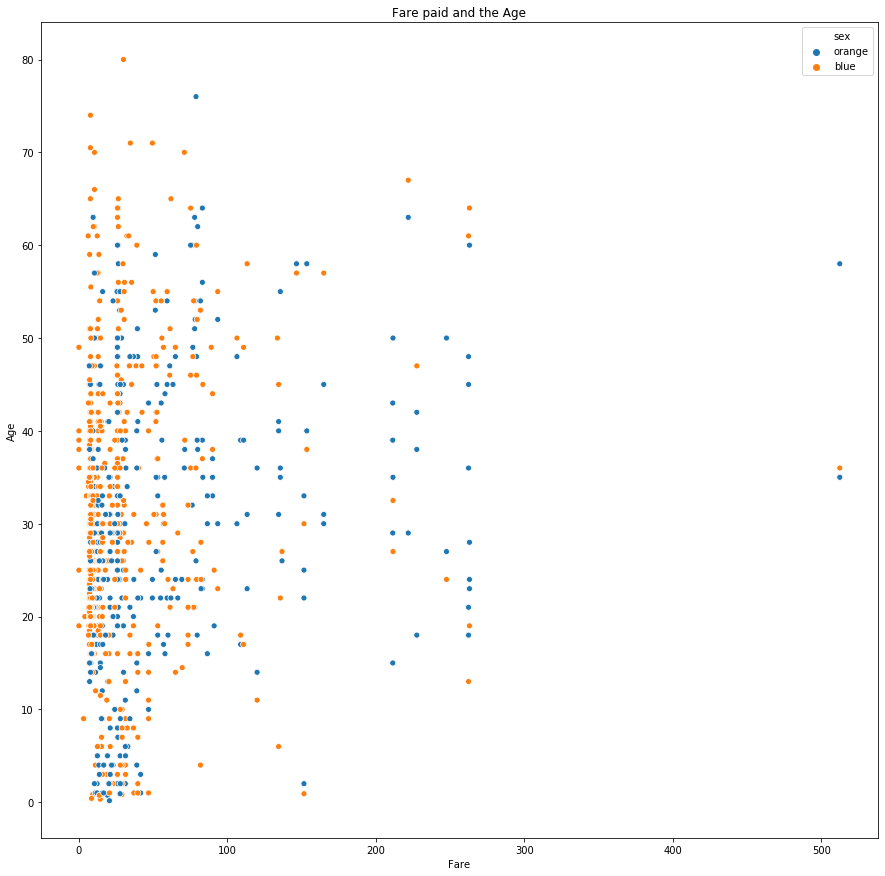

In [30]:
plt.figure(figsize=(15,15))
colors = {'male':'blue', 'female':'orange'}
ax=sns.scatterplot(titanic['fare'],titanic['age'],hue=titanic['sex'].iloc[:-1].apply(lambda x: colors[x]))
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_title('Fare paid and the Age')